In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

### Simulating the 2D Ising model for an $N^2$ particle system,  assuming ferromagnetic order with $J = 1$.

In [6]:
# Function to initialize spin array

def spin_init(N, cold = False):
    if cold:
        state = np.indices((N, N)).sum(axis=0) % 2
        state = np.vectorize(lambda x: int(2 * (x - 0.5)))(state)
    else:
        state = 2*np.random.randint(2, size = (4, 4))-1
    return state

# Function to run a Monte-Carlo move using the Metropolis algorithm with a given temperature

def rand_spin(state, T):
    N = len(state)
    
    for i in range(N):
        for j in range(N):
            a, b = np.random.randint(0, N, size = (2, 1))
            spin = state[a, b]
            nb = state[(i + 1)%N, j] + state[(i-1)%N, j]     #Using periodic condition
            nb += state[i, (j + 1)%N] + state[i, (j-1)%N]
            del_E = 2 * spin * nb
            
            if del_E < 0:
                spin *= -1
            elif np.random.rand() < np.exp(-del_E / T):
                spin *= -1
            state[a, b] = spin
    return state
    
    

# Function to calculate energy of a given state

def E_state(state, J = 1, B = 0):
    energy = 0
    N = len(state)
    for i in range(N):
        for j in range(N):
            s = state[i, j]
            nb = state[(i + 1)%N, j] + state[(i-1)%N, j]     #Using periodic condition
            nb += state[i, (j + 1)%N] + state[i, (j-1)%N]
            energy += -nb * s
    energy *= 0.5*J
    energy += -B * np.sum(state)
    return energy

# Plot a given state

def plot_state(state, fig, time, pos):
    N = len(state)
    x, y = np.meshgrid(range(N), range(N))
    sub_plot = fig.add_subplot(3, 3, pos)
    plt.setp(sub_plot.get_yticklabels(), visible=False)
    plt.setp(sub_plot.get_xticklabels(), visible=False)      
    plt.pcolormesh(x, y, state, cmap=plt.cm.BuGn);
    plt.title('Time=%d'%time); plt.axis('tight')  


def ising_spin(init_state, num_iter, T):
    
    N = len(init_state)
    state = init_state.copy()
    
    fig = plt.figure(figsize = (15, 15))
    plot_state(state, fig, 0, 1)
    key_times = [int(i) for i in np.logspace(0, np.log10(num_iter-1), 5)]
    
    for i in range(num_iter):
        rand_spin(state, T)
        if i == key_times[0]:
            plot_state(state, fig, i, 2)
        if i == key_times[1]:
            plot_state(state, fig, i, 3)
        if i == key_times[2]:
            plot_state(state, fig, i, 4)
        if i == key_times[3]:
            plot_state(state, fig, i, 5)
        if i == key_times[4]:
            plot_state(state, fig, i, 6)
    plt.show()
    
    
# Given an initial state and temperature array, finds the energy and magnetization arrays

def met_spin(init_state, num_iter, T, eq = 2**8, mc = 2**9):

    N = len(init_state)
    
    E = np.zeros(len(T))
    M = np.zeros(len(T))
    
    for i in range(len(T)):
        current_state = init_state.copy()       
        current_E = current_M = 0
        temp = T[i]
        
        for j in range(eq):    # Calibration to reach an equilibrium state
            rand_spin(current_state, temp)
        
        for j in range(mc):    # Running multiple Monte-Carlo simulations to find average values for E and M
            rand_spin(current_state, temp)
            
            current_E += E_state(current_state)
            current_M += np.sum(current_state)
            
        E[i] = current_E / (mc * N**2)
        M[i] = current_M / (mc * N**2)
        
    return E, M


<ipython-input-2-e6496153dcc5>:56: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(x, y, state, cmap=plt.cm.BuGn);


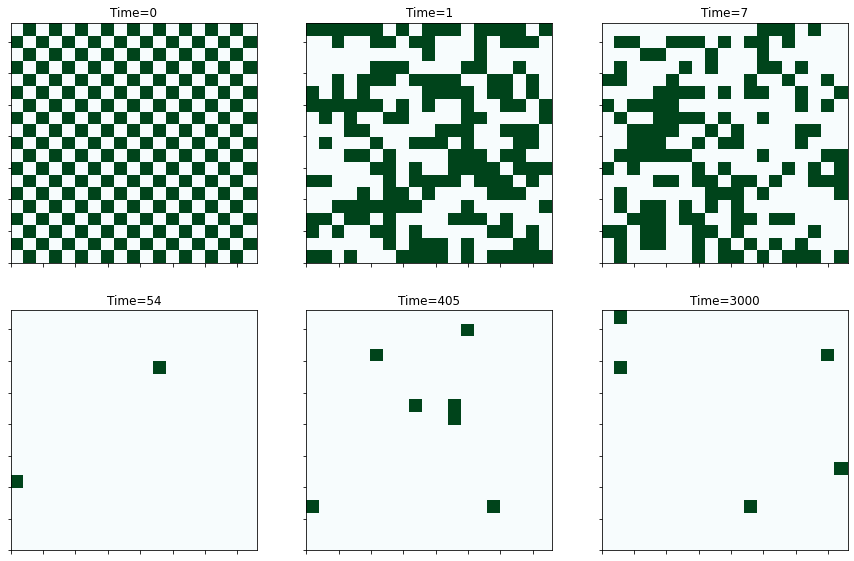

Time taken: 44.466


In [3]:
time_start = time.time()

init_state = spin_init(20, True)
ising_spin(init_state, 3001, 1.8)

print("Time taken:", round(time.time()-time_start, 3))

Time taken: 128.205


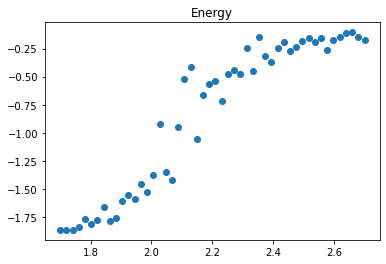

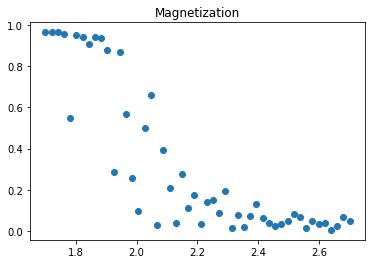

In [7]:
time_start = time.time()

init_state = spin_init(10, True)
T_array = np.linspace(1.7, 2.7, 50)
E_array, M_array = met_spin(init_state, 1000, T_array)

print("Time taken:", round(time.time()-time_start, 3))
    
plt.figure(1)
plt.scatter(T_array, E_array)
plt.title('Energy')
plt.show(1)

plt.figure(2)
plt.scatter(T_array, abs(M_array))
plt.title('Magnetization')
plt.show(2)


We can estimate the Curie temperature to be around T = 2.1, in the simplified units used for this model. At this temperature, we can see that the average value for the magnetization drops from about 1 to approximately 0. This model could be improved greatly if any of the iterative parameters such as N, eq, or mc were increased. In addition, using a greater number of T values closer to the Curie temperature could help with increasing the accuracy in the estimation. 